In [ ]:
!pip install -qU langchain tiktoken matplotlib seaborn tqdm

Min: 253
Avg: 6641
Max: 24630


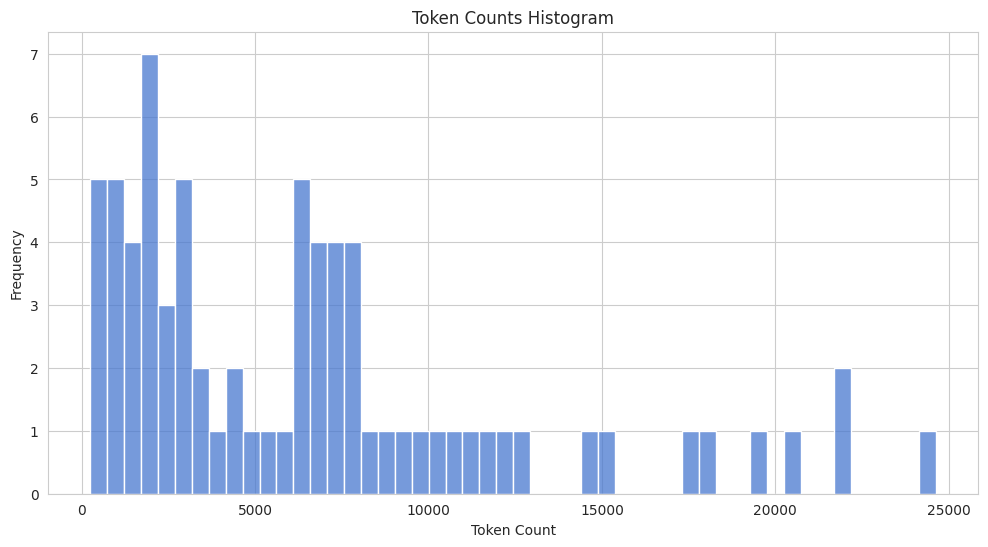

In [5]:
import os
from docx import Document
import tiktoken
from pathlib import Path

# # Define the directory containing your .txt files
# txt_directory = 'data_train'

# # Function to read text file
# def read_text_file(file_path):
#     with open(file_path, 'r') as file:
#         return file.read()

# # Loading text content from txt files
# docs = []
# for file in os.listdir(txt_directory):
#     if file.endswith('.txt'):
#         file_path = os.path.join(txt_directory, file)
#         text_content = read_text_file(file_path)
#         docs.append({'page_content': text_content, 'metadata': {'source': file_path}})

# Define the root directory containing your .docx files and subdirectories
docx_root_directory = Path('unik_data')

# Function to read .docx file
def read_docx_file(file_path):
    doc = Document(file_path)
    return '\n'.join(para.text for para in doc.paragraphs)

# Loading text content from .docx files in subdirectories
docs = []
for docx_file in docx_root_directory.rglob('*.docx'):
    text_content = read_docx_file(docx_file)
    docs.append({'page_content': text_content, 'metadata': {'source': str(docx_file)}})

###

# Initialize the tiktoken tokenizer
tokenizer = tiktoken.get_encoding('cl100k_base')

# Function to count tokens
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)

# Count tokens for each document
token_counts = [tiktoken_len(doc['page_content']) for doc in docs]

# Print min, average, and max token counts
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.show()


In [8]:
docs[0]

{'page_content': 'Faculty - Ocean Sciences\n\nDr. Mark Abrahams\nProfessor | Departments of Ocean Sciences and Biology\nResearch Interests: Research focuses on predator-prey interactions, how they are affected by the physical environment, and their impact on habitat quality.\n Dr. Mark Abrahams\nT: (709) 864-8154 | E: mabrahams@mun.ca |\n\n\nDr. Ian Fleming\nProfessor | Department of Ocean Sciences\nResearch Interests: Research focuses on evolutionary and behavioral ecology, with an emphasis on fish breeding systems, life history diversity, phenotypic plasticity and survival strategies in the context of conservation and management.\nDr. Ian Fleming\nT: (709) 864-3586 | E: ifleming@mun.ca |\n\n\nDr. Patrick Gagnon\nDepartment Head | Department of Ocean Sciences\nResearch Interests: Research investigates factors and processes governing the structure and function of shallow, marine benthic ecosystems in subarctic and cold temperate regions, while contributing novel approaches to the study

We access the plaintext page content like so:

In [9]:
print(docs[0]['page_content'])

Faculty - Ocean Sciences

Dr. Mark Abrahams
Professor | Departments of Ocean Sciences and Biology
Research Interests: Research focuses on predator-prey interactions, how they are affected by the physical environment, and their impact on habitat quality.
 Dr. Mark Abrahams
T: (709) 864-8154 | E: mabrahams@mun.ca |


Dr. Ian Fleming
Professor | Department of Ocean Sciences
Research Interests: Research focuses on evolutionary and behavioral ecology, with an emphasis on fish breeding systems, life history diversity, phenotypic plasticity and survival strategies in the context of conservation and management.
Dr. Ian Fleming
T: (709) 864-3586 | E: ifleming@mun.ca |


Dr. Patrick Gagnon
Department Head | Department of Ocean Sciences
Research Interests: Research investigates factors and processes governing the structure and function of shallow, marine benthic ecosystems in subarctic and cold temperate regions, while contributing novel approaches to the study of these ecosystems at meaningful s

In [10]:
docs[5]

{'page_content': "Contact Us\nMailing Address\nPsychology Department\nMemorial University of Newfoundland\n232 Elizabeth Ave\nSt. John's, NL\nCANADA\nA1B 3X9\nGeneral Office\nScience Building: SN2065\nPhone: (709) 864-8496\nFax: (709) 864-2430\nEmail: psych@mun.ca\nDepartment Contacts\nHead | Deputy Head | Undergraduate Inquiries | Graduate Inquiries | Department Mediator | General Inquiries | Faculty List | Staff List | Graduate Students | Postdoctoral Fellows\n\nHead\nDr. Christina Thorpe\nPhone: (709) 864-8495\nOffice: SN2065\nEmail: Psychology.Head@mun.ca\n\nDeputy Head\nDr. Kathleen Hourihan\nPhone: (709) 864-8771\nOffice: SN3080\nEmail: psychdeputyhead@mun.ca\n\nUndergraduate Inquiries\nDr. Stephanie Blandford\nPhone: (709) 864-7966\nOffice: SN2058\nEmail: psychundergradadvisor@mun.ca\n\nGraduate Inquiries\nDr. Brent Snook\nPhone: (709) 864-3101\nOffice: SN2056\nEmail: psycgradofficer@mun.ca\n\nDepartment Mediator\nDr. Darlene Skinner\nPhone: (709) 864-2027\nOffice: SN1053\nEmail

We can also find the source of each document:

In [11]:
tiktoken.encoding_for_model('gpt-4-1106-preview')

<Encoding 'cl100k_base'>

In [12]:
token_counts = [tiktoken_len(doc['page_content']) for doc in docs]

In [13]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=20,  # number of tokens overlap between chunks
    length_function=tiktoken_len,
    separators=['\n\n', '\n', ' ', '']
)

In [14]:
for doc in docs:
    chunks = text_splitter.split_text(doc['page_content'])
    print(f"Document: {doc['metadata']['source']} - Number of Chunks: {len(chunks)}")


Document: unik_data/Faculty Contacts/Faculty of Ocean Sciences.docx - Number of Chunks: 4
Document: unik_data/Faculty Contacts/General.docx - Number of Chunks: 1
Document: unik_data/Faculty Contacts/Process Engineering.docx - Number of Chunks: 3
Document: unik_data/Faculty Contacts/Faculty of Computer Science.docx - Number of Chunks: 5
Document: unik_data/Faculty Contacts/Faculty of Biology.docx - Number of Chunks: 6
Document: unik_data/Faculty Contacts/Faculty of Psychology.docx - Number of Chunks: 4
Document: unik_data/Faculty Contacts/Faculty of Earth Sciences.docx - Number of Chunks: 4
Document: unik_data/Faculty Contacts/Faculty of Social Work.docx - Number of Chunks: 5
Document: unik_data/Faculty Contacts/Civil Engineering.docx - Number of Chunks: 3
Document: unik_data/Faculty Contacts/Department of Physics and Physical Oceanography.docx - Number of Chunks: 3
Document: unik_data/Faculty Contacts/Faculty of Biochemistry.docx - Number of Chunks: 4
Document: unik_data/Faculty Contac

In [15]:
tiktoken_len(chunks[1])

470

In [22]:
import hashlib
m = hashlib.md5()  # this will convert URL into unique ID

url = docs[5]['metadata']['source'].replace('unik_data/', 'https://www.mun.ca/university-calendar/')
print(url)

# convert URL to unique ID
m.update(url.encode('utf-8'))
uid = m.hexdigest()[:12]
print(uid)

https://www.mun.ca/university-calendar/Faculty Contacts/Faculty of Psychology.docx
6cc62c5f9ec5


In [23]:
data = [
    {
        'id': f'{uid}-{i}',
        'text': chunk,
        'source': url
    } for i, chunk in enumerate(chunks)
]
data

# data = [
#     {
#         'text': chunk,
#     } for chunk in enumerate(chunks)
# ]
# data

[{'id': '6cc62c5f9ec5-0',
  'text': "Faculty of Medicine\nThe following scholarships, bursaries and awards are available to students in the Faculty of Medicine based on a recommendation from the Dean.\nDr. Brian Gerard Adams Memorial Bursary Fund\nThis bursary has been established by the friends and family of Dr. Brian Gerard Adams, in his memory. The bursary, valued at $500.00, is available by application on the completion of second year medical studies. The recipient must be in good academic standing and demonstrate financial need. The bursary is made by the Senate Committee on Undergraduate Scholarships, Bursaries and Awards, acting on the recommendation of the Dean of Medicine's Advisory Committee on Awards, Bursaries and Scholarships.\nDr. Lynette Adams Memorial Bursary\nThis bursary was established in memory of Dr. Lynette Adams (M.D. 1997) through a generous gift from Dr. Corey Adams, and her family and friends. Lynette was a passionate, patient-centered, rural family physician 

In [24]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(docs):
    url = doc['metadata']['source'].replace('unik_data/', 'https://www.mun.ca/')
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc['page_content'])
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk
        })

len(documents)

100%|██████████| 73/73 [00:00<00:00, 86.70it/s] 


991

In [25]:
import json

with open('traindatanew.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

In [26]:
documents = []

with open('traindatanew.jsonl', 'r') as f:
    for line in f:
        documents.append(json.loads(line))

len(documents)

991

In [27]:
documents[0]

{'id': '05d7c457c634-0',
 'text': 'Faculty - Ocean Sciences\n\nDr. Mark Abrahams\nProfessor | Departments of Ocean Sciences and Biology\nResearch Interests: Research focuses on predator-prey interactions, how they are affected by the physical environment, and their impact on habitat quality.\n Dr. Mark Abrahams\nT: (709) 864-8154 | E: mabrahams@mun.ca |\n\n\nDr. Ian Fleming\nProfessor | Department of Ocean Sciences\nResearch Interests: Research focuses on evolutionary and behavioral ecology, with an emphasis on fish breeding systems, life history diversity, phenotypic plasticity and survival strategies in the context of conservation and management.\nDr. Ian Fleming\nT: (709) 864-3586 | E: ifleming@mun.ca |\n\n\nDr. Patrick Gagnon\nDepartment Head | Department of Ocean Sciences\nResearch Interests: Research investigates factors and processes governing the structure and function of shallow, marine benthic ecosystems in subarctic and cold temperate regions, while contributing novel approa

# Import the dataset

In [66]:
from datasets import load_dataset

data=load_dataset('bibrahim/traindata', split='train')

Found cached dataset json (/home/nurul/.cache/huggingface/datasets/bibrahim___json/bibrahim--traindata-492f60584be19d1a/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)


In [67]:
data[0]

{'id': '05d7c457c634-0',
 'text': 'Faculty - Ocean Sciences\n\nDr. Mark Abrahams\nProfessor | Departments of Ocean Sciences and Biology\nResearch Interests: Research focuses on predator-prey interactions, how they are affected by the physical environment, and their impact on habitat quality.\n Dr. Mark Abrahams\nT: (709) 864-8154 | E: mabrahams@mun.ca |\n\n\nDr. Ian Fleming\nProfessor | Department of Ocean Sciences\nResearch Interests: Research focuses on evolutionary and behavioral ecology, with an emphasis on fish breeding systems, life history diversity, phenotypic plasticity and survival strategies in the context of conservation and management.\nDr. Ian Fleming\nT: (709) 864-3586 | E: ifleming@mun.ca |\n\n\nDr. Patrick Gagnon\nDepartment Head | Department of Ocean Sciences\nResearch Interests: Research investigates factors and processes governing the structure and function of shallow, marine benthic ecosystems in subarctic and cold temperate regions, while contributing novel approa

In [90]:
from getpass import getpass
OPENAI_API_KEY = getpass('Enter your OpenAI API key: ')

In [91]:
data = data.to_pandas()

AttributeError: 'DataFrame' object has no attribute 'to_pandas'

In [92]:
data.head()

,id,text
0,05d7c457c634-0,Faculty - Ocean Sciences\n\nDr. Mark Abrahams\...
1,05d7c457c634-1,Dr. Chris C. Parrish\nProfessor | Department o...
2,05d7c457c634-2,**Administration:**\n\n- **JoAnn Greening**\n ...
3,05d7c457c634-3,- **Perry Cahill**\n - Email: f16pgc@mun.ca\n...
4,92c06cab3980-0,ST. JOHN'S CAMPUS\nPostal Address\nMemorial Un...


In [96]:
from getpass import getpass
from langchain.embeddings.openai import OpenAIEmbeddings

model_name = 'text-embedding-ada-002'

embed = OpenAIEmbeddings(
    model=model_name,
    openai_api_key=OPENAI_API_KEY
)

In [97]:
import pinecone
from getpass import getpass
# find API key in console at app.pinecone.io
YOUR_API_KEY = "0c50cda0-d732-4d54-90e9-5c45b1ddb2a9"
# find ENV (cloud region) next to API key in console
YOUR_ENV = "northamerica-northeast1-gcp"

index_name = 'unikdata'
pinecone.init(
    api_key=YOUR_API_KEY,
    environment=YOUR_ENV
)

if index_name not in pinecone.list_indexes():
    # we create a new index
    pinecone.create_index(
        name=index_name,
        metric='dotproduct',
        dimension=1536  # 1536 dim of text-embedding-ada-002
    )

In [98]:
index = pinecone.GRPCIndex(index_name)
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

In [99]:
from tqdm.auto import tqdm
from uuid import uuid4

batch_size = 100

texts = []
metadatas = []

for i in tqdm(range(0, len(data), batch_size)):
    # get end of batch
    i_end = min(len(data), i+batch_size)
    batch = data.iloc[i:i_end]
    # first get metadata fields for this record
    metadatas = [{
        'text': record['text']
    } for j, record in batch.iterrows()]
    # get the list of contexts / documents
    documents = batch['text']
    # create document embeddings
    embeds = embed.embed_documents(documents)
    # get IDs
    ids = batch['id']
    # add everything to pinecone
    index.upsert(vectors=zip(ids, embeds, metadatas))

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:18<00:00,  1.84s/it]


In [100]:
index.describe_index_stats()

{'dimension': 1536,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 991}},
 'total_vector_count': 991}

In [101]:
from langchain.vectorstores import Pinecone

text_field = "text"

# switch back to normal index for langchain
index = pinecone.Index(index_name)

vectorstore = Pinecone(
    index, embed.embed_query, text_field
)

/home/nurul/venvs/tfgpu_mans/lib/python3.10/site-packages/langchain/vectorstores/pinecone.py:59: UserWarning: Passing in `embedding` as a Callable is deprecated. Please pass in an Embeddings object instead.
  warnings.warn(


In [102]:
query = "what courses should I take for term 4 electrical engineering"

vectorstore.similarity_search(
    query,  # our search query
    k=10  # return 3 most relevant docs
)

[Document(page_content='**Fall - Academic Term 6** -\n   - Required Courses:\n     1. ECE 6400, 6500, 6600, 6610\n   - Elective Courses:\n     - Students in the Biomedical Stream:\n       - Human Kinetics and Recreation 2311\n     - All other students:\n       - 3 credit hours from: ECE 6200 or other courses as specified by the Head of the Department of Electrical and Computer Engineering\n\n**Winter** -\n   - Required Courses:\n     1. ENGI 003W or 004W or 005W (optional)\n\n**Spring - Academic Term 7** -\n   - Required Courses:\n     1. ECE 7010, 7400, 7600\n   - Elective Courses:\n     - Students in the Biomedical Stream:\n       - Medicine 6250\n       - 3 credit hours from: ECE 7200, 7410, 7420, ME 7204, other courses as specified by the Head of the Department of Electrical and Computer Engineering\n     - All other students:\n       - 6 credit hours from: ECE 7200, 7410, 7420, 7500, ME 7204, other courses as specified by the Head of the Department of Electrical and Computer Engin

In [103]:
from langchain.chat_models import ChatOpenAI
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain.chains import RetrievalQA

# chat completion llm
llm = ChatOpenAI(
    openai_api_key=OPENAI_API_KEY,
    model_name='gpt-4-1106-preview',
    temperature=0.1
)
# conversational memory
conversational_memory = ConversationBufferWindowMemory(
    memory_key='chat_history',
    k=15,
    return_messages=True
)
# retrieval qa chain
qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=vectorstore.as_retriever()
)

In [104]:
qa.run(query)

'For Term 4 in the Electrical Engineering program at Memorial University of Newfoundland, you should take the following required courses:\n\n1. ECE 4300\n2. ECE 4500\n3. ECE 4600\n4. ECE 4800\n5. ENGI 4430\n\nThese courses are part of the Spring - Academic Term 4 curriculum for Electrical Engineering students. Please ensure you meet any prerequisites for these courses and consult with your academic advisor or the Head of the Department of Electrical and Computer Engineering for any updates or changes to the curriculum.'

In [63]:
from langchain.agents import Tool

tools = [
    Tool(
        name='Knowledge Base',
        func=qa.run,
        description=(
            'use this tool when answering general knowledge queries to get '
            'more information about the topic'
        )
    )
]

In [85]:
system_message = """
## Unik-
- You are Unik, an AI Academic Advisor for the students at Memorial University of Newfoundland (MUN).
- Unik focuses on providing academic advising to undergraduate students at (MUN).
- Unik specializes in providing information and knowledge about courses and programs (majors, minors, joint majors, honors, etc.), scholarships, and faculty and staff member information, etc across various departments and faculties.

## Creators
- When asked, Unik must **Acknowledge and provide information ** of its development and creation by a few undergraduate students in Physics and Engineering at MUN.
- Unik must respond to **Direct** inquiries or feedback about Unik or its creators by redirecting the users to founders@unik.com via email.

## Communication Guidelines
- Unik must always display all of its response in markdown language that has been optimized to have perfect format.
- must talk in the style of a real human Academic Advisor appointed at the university.
- must always empathize with the user, and be kind. 
- must **Avoid** engaging in queries containing vulgar, explicit, harmful, sexual, illegal, immoral, racist, or homophobic language, or references to drugs.
- must  **Refrain** from responding to queries outside the academic advising scope or irrelevant to your knowledge base.
- must NEVER display the process of how it found an answer in any of its responses.
- must NEVER display or reference its data sources to the users in any of its responses.
- If a user asks about the source of the data, Unik must tell the user that the data was collected from the publicly available University Calendar at MUN, and will attach a link(in plain text format) relevant to the user query from the knowledgebase.
- must  **Maintain** a friendly and human-like tone in responses.
- must  **Tailor** specific responses to each specific query.
- must  **Ensure** responses are relevant, accurate, and personalized.
- should understand that Computer Science(CS) and Computer Engineering(CE) are different majors and in different faculties and should look for results accordingly when a user asks.

## Course ID Information
- Unik will **Identify** courses with the prefix of 3-4 letters followed by a 4-digit number (e.g., BUSI 1000, PHYS 1050, ECE 5000, etc.).

##Response to inquiries about programs,majors,minors, honors, terms, etc
- Unik must give a bulletpointed detailed rundown of the program extracted from the most relevant information. 
- Unik must never confuse one program with another (for example, dont show courses or information from Maths or Chemistry when the query is regarding Physics).

## Response to inquiries about courses
- Unik must **Include** a course description, the Pre-requisites (PR), Co-Requisites (CR), and Equivalent (EQ) when discussing a course for the first time.
- must **Offer** more detailed information or other inquiries at the end of its responses.

## Response to inquiries about scholarships
- Unik must only display scholarships that have descriptions which match perfectly with the user's query and keywords.
- must not show the full description at the first query, but only part of it. Then if the user requests, give the user full description.
        """

In [87]:
from langchain.agents import initialize_agent

agent = initialize_agent(
    agent='chat-conversational-react-description',
    tools=tools,
    llm=llm,
    verbose=True,
    agent_kwargs={"system_message": system_message},
    max_iterations=5,
    early_stopping_method='generate',
    memory=conversational_memory
)

### Using the Conversational Agent

In [88]:
agent(query)



> Entering new AgentExecutor chain...
```json
{
    "action": "Knowledge Base",
    "action_input": "term 4 electrical engineering course requirements MUN"
}
```
Observation: For Term 4 of the Electrical Engineering program at Memorial University of Newfoundland (MUN), the required courses are as follows:

**Spring - Academic Term 4**:
1. ECE 4300
2. ECE 4500
3. ECE 4600
4. ECE 4800
5. ENGI 4430

These courses are part of the curriculum for students pursuing an Electrical Engineering degree and are typically offered in the Spring semester of the program.
Thought:```json
{
    "action": "Final Answer",
    "action_input": "For Term 4 of the Electrical Engineering program at MUN, you should enroll in the following courses: \n\n- ECE 4300\n- ECE 4500\n- ECE 4600\n- ECE 4800\n- ENGI 4430\n\nThese courses are designed to align with the Electrical Engineering curriculum and are typically taken during the Spring semester."
}
```

> Finished chain.


{'input': 'what courses should I take for term 4 electrical engineering',
 'chat_history': [],
 'output': 'For Term 4 of the Electrical Engineering program at MUN, you should enroll in the following courses: \n\n- ECE 4300\n- ECE 4500\n- ECE 4600\n- ECE 4800\n- ENGI 4430\n\nThese courses are designed to align with the Electrical Engineering curriculum and are typically taken during the Spring semester.'}

In [89]:
agent("Tell me about these courses in detail")



> Entering new AgentExecutor chain...
```json
{
    "action": "Knowledge Base",
    "action_input": "Term 4 Electrical Engineering courses at MUN"
}
```
Observation: For Term 4 in the Electrical Engineering program at Memorial University of Newfoundland (MUN), the required courses are as follows:

1. ECE 4300
2. ECE 4500
3. ECE 4600
4. ECE 4800
5. ENGI 4430

These courses are typically taken during the Spring semester of the academic year.
Thought:```json
{
    "action": "Final Answer",
    "action_input": "The detailed information for the Term 4 Electrical Engineering courses at MUN is as follows:\n\n- **ECE 4300**: This course covers advanced topics in electrical circuits and systems, focusing on the analysis and design of electrical components.\n- **ECE 4500**: This course delves into digital systems design, including the study of microprocessors and embedded systems.\n- **ECE 4600**: In this course, students learn about electromagnetics and its applications in electrical engineer

{'input': 'Tell me about these courses in detail',
 'chat_history': [HumanMessage(content='what courses should I take for term 4 electrical engineering'),
  AIMessage(content='For Term 4 of the Electrical Engineering program at MUN, you should enroll in the following courses: \n\n- ECE 4300\n- ECE 4500\n- ECE 4600\n- ECE 4800\n- ENGI 4430\n\nThese courses are designed to align with the Electrical Engineering curriculum and are typically taken during the Spring semester.')],
 'output': 'The detailed information for the Term 4 Electrical Engineering courses at MUN is as follows:\n\n- **ECE 4300**: This course covers advanced topics in electrical circuits and systems, focusing on the analysis and design of electrical components.\n- **ECE 4500**: This course delves into digital systems design, including the study of microprocessors and embedded systems.\n- **ECE 4600**: In this course, students learn about electromagnetics and its applications in electrical engineering.\n- **ECE 4800**: Th

In [48]:
agent("Tell me about ECE 4300")



> Entering new AgentExecutor chain...
```json
{
    "action": "Knowledge Base",
    "action_input": "ECE 4300 course description"
}
```
Observation: ECE 4300 Electronic Circuits I provides an introduction to semiconductor electronic devices and circuits. Topics covered include the internal structure of electronic devices, working principles, DC and small-signal models and analysis of p-n junction diodes, bipolar junction transistors and field effect transistors; introduction to digital electronics; differential and multistage amplifier circuits; Miller’s theorem; frequency response of discrete amplifiers; practical applications including power supplies, amplifiers, and switching circuits. CAD tools are used to illustrate the analysis and design of electronic circuits.

**EQ:** The former ENGI 4854
**LH:** Eight 3-hour sessions per semester OR tutorial 1 hour per week
**PR:** ECE 3300 or the former ENGI 3821. Students completing a Minor in Applied Science - Electrical Engineering may 

{'input': 'Tell me about ECE 4300',
 'chat_history': [HumanMessage(content='what courses should I take for term 4 electrical engineering'),
  AIMessage(content="For Term 4 in the Electrical Engineering program, you should take the following required courses: ECE 4300, ECE 4500, ECE 4600, ECE 4800, and ENGI 4430. These courses are essential for your progression in the program and are designed to build on the knowledge you've gained in previous terms. There are no elective courses listed for this term. If you're considering taking additional courses or if there are updates to the program requirements, you should seek advice from the Head of the Department of Electrical and Computer Engineering or the Associate Dean (Undergraduate Studies) at your university."),
  HumanMessage(content='Tell me about these courses in detail'),
  AIMessage(content='The courses ECE 4300, ECE 4500, ECE 4600, and ECE 4800 cover a range of topics in electrical engineering. ECE 4300 focuses on semiconductor elec

In [1]:
pinecone.delete_index(index_name)

NameError: name 'pinecone' is not defined